**ML Lab**

**Experiment- 2**

Sahdeep Singh (23/CS/355)

In [38]:
!pip install pandas seaborn missingno openpyxl

In [39]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import missingno as msno
pd.set_option('display.max_columns', None)


# 1) Load Titanic CSV


In [40]:
print("### 1) Loading Titanic Dataset")
# Use seaborn's sample to avoid external downloads:
titanic = sns.load_dataset('titanic')
titanic.to_csv('titanic.csv', index=False)
df = pd.read_csv('titanic.csv')
print(df.head())

### 1) Loading Titanic Dataset
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


# 2) EDA Pass: .info(), .describe(), NA heatmap

In [41]:
print("### 2) Exploratory Data Analysis (EDA)")
print("#### .info() output:")
df.info()

### 2) Exploratory Data Analysis (EDA)
#### .info() output:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Note: 'age', 'embarked', 'deck', and 'embark_town' have missing values.
'deck' has a significant number of missing values.

In [42]:
print("\n#### .describe() output:")
print(df.describe())


#### .describe() output:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Note: The 'fare' column has a very large max value compared to the 75th percentile,
indicating potential outliers.


#### Missing values heatmap:


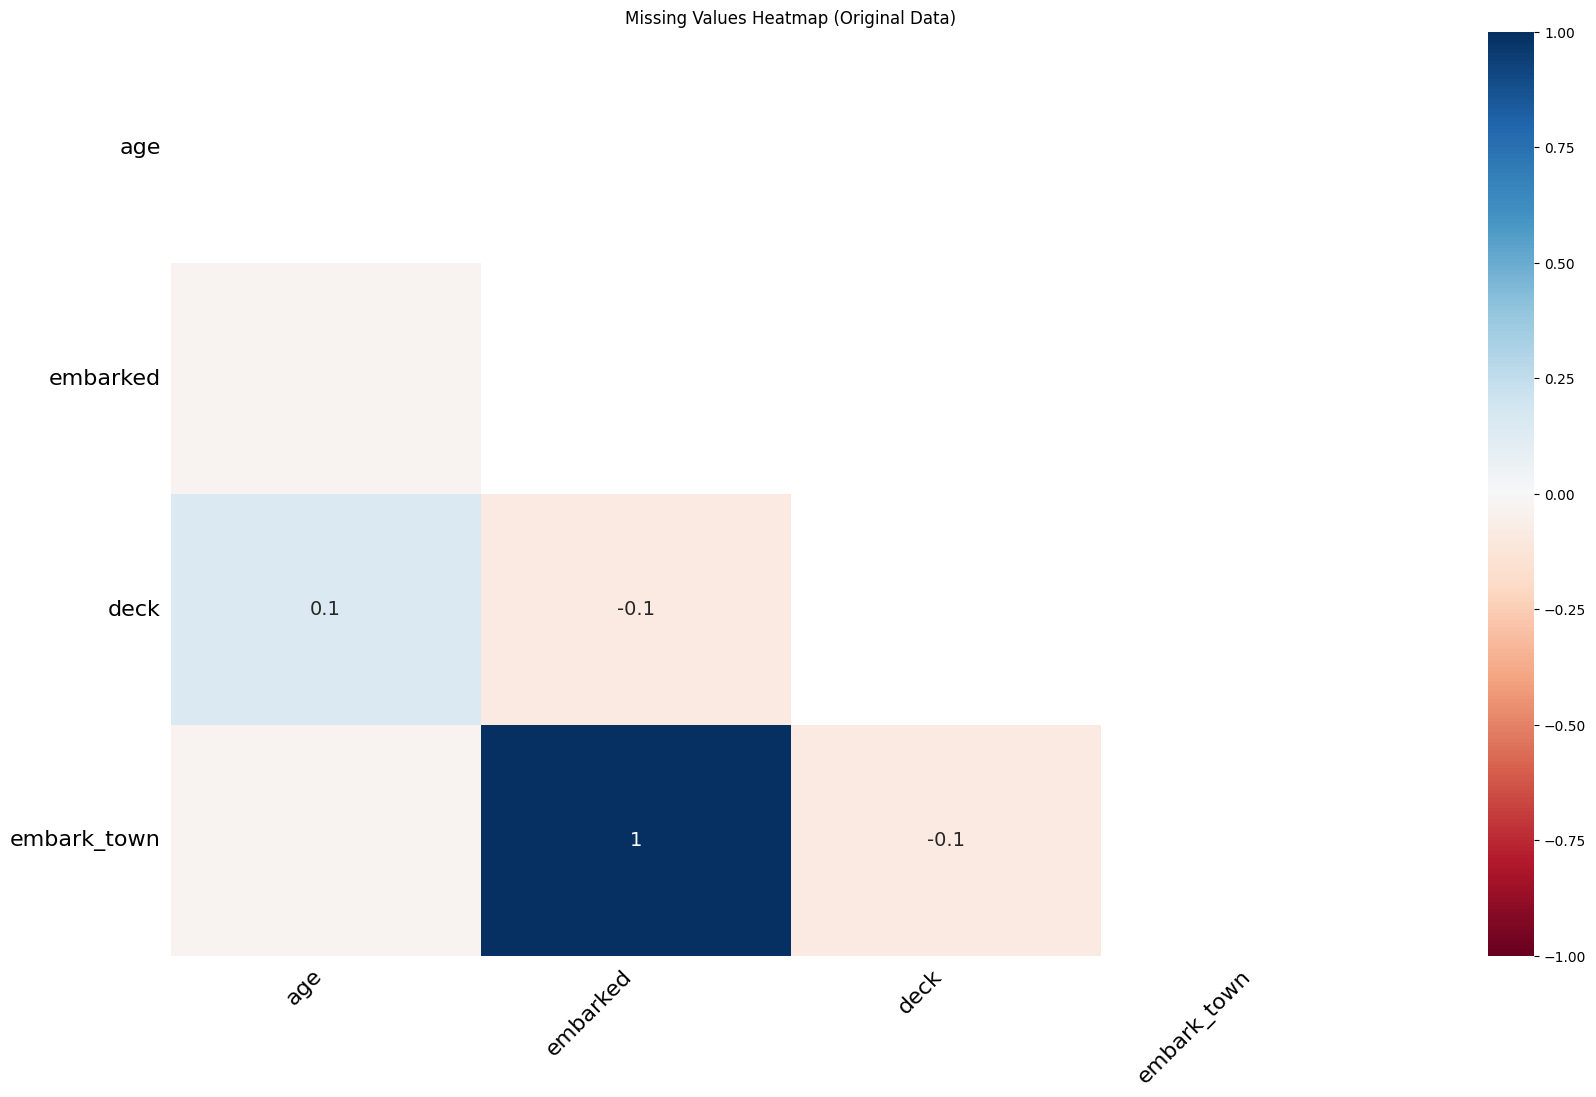

In [43]:
print("\n#### Missing values heatmap:")
msno.heatmap(df)
plt.title('Missing Values Heatmap (Original Data)')
plt.show()

# 3) Missing: impute & flag

In [44]:
print("### 3) Handling Missing Values")
clean = df.copy()

for col in clean.columns:
    if clean[col].isna().any():
        clean[col + '_was_missing'] = clean[col].isna()
        if clean[col].dtype.kind in 'biuf':
            # Numeric columns: impute with median
            median_val = clean[col].median()
            clean[col] = clean[col].fillna(median_val)
            print(f"Imputed numeric column '{col}' with median: {median_val}")
        else:
            # Categorical columns: impute with mode
            mode_val = clean[col].mode().iloc[0]
            clean[col] = clean[col].fillna(mode_val)
            print(f"Imputed categorical column '{col}' with mode: '{mode_val}'")

print("\n#### Cleaned DataFrame (post-imputation) info:")
clean.info()

### 3) Handling Missing Values
Imputed numeric column 'age' with median: 28.0
Imputed categorical column 'embarked' with mode: 'S'
Imputed categorical column 'deck' with mode: 'C'
Imputed categorical column 'embark_town' with mode: 'Southampton'

#### Cleaned DataFrame (post-imputation) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sex                      891 non-null    object 
 3   age                      891 non-null    float64
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   embarked                 891 non-null    object 
 8   class                    891 non-null    object 
 9   wh

# 4) Outliers: Fare treatment (chosen method: IQR clip)

In [45]:
print("### 4) Handling Outliers in 'fare'")

### 4) Handling Outliers in 'fare'


Method: IQR Clip
Rationale: This method is simple and effective for handling outliers without
removing any data points, thereby preserving the sample size. It caps extreme
values at a sensible boundary, preventing them from skewing models.

Text(0.5, 1.0, 'Fare Distribution (Original)')

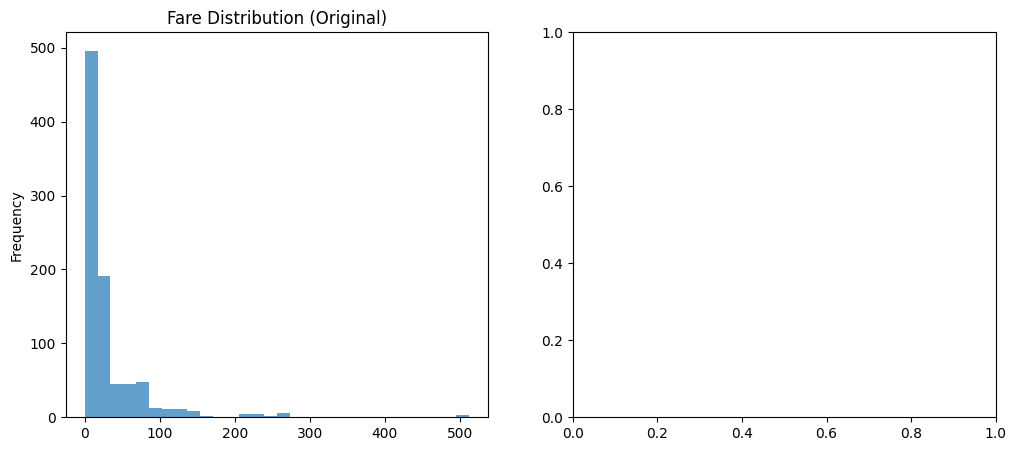

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df['fare'].plot(kind='hist', bins=30, alpha=0.7, ax=ax[0])
ax[0].set_title('Fare Distribution (Original)')

Apply the IQR clip

In [47]:
Q1, Q3 = clean['fare'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lb, ub = Q1 - 1.5*IQR, Q3 + 1.5*IQR
clean['fare'] = clean['fare'].clip(lower=lb, upper=ub)

After Plot

In [48]:
clean['fare'].plot(kind='hist', bins=30, alpha=0.7, ax=ax[1])
ax[1].set_title('Fare Distribution (Post-Treatment)')
plt.tight_layout()
plt.show()

print(f"IQR clip applied to 'fare' column. Lower bound: {round(lb, 2)}, Upper bound: {round(ub, 2)}")
print("\n" + "="*50 + "\n")

<Figure size 640x480 with 0 Axes>

IQR clip applied to 'fare' column. Lower bound: -26.72, Upper bound: 65.63




# 5) Save artifacts

In [49]:
print("### 5) Saving Artifacts")
clean.to_csv('clean_v1.csv', index=False)

### 5) Saving Artifacts
